**1. First we make sure our file is readable, we assign a DataFrame variable to the file and take a first look at the file.**

Categorical Features: ['Job Title', 'Salary Estimate', 'Job Description', 'Company Name', 'Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors']
Numerical Features: ['index', 'Rating', 'Founded']

Percentage of missing values in categorical features:
Job Title            0.0
Salary Estimate      0.0
Job Description      0.0
Company Name         0.0
Location             0.0
Headquarters         0.0
Size                 0.0
Type of ownership    0.0
Industry             0.0
Sector               0.0
Revenue              0.0
Competitors          0.0
dtype: float64

Percentage of missing values in numerical features:
index      0.0
Rating     0.0
Founded    0.0
dtype: float64


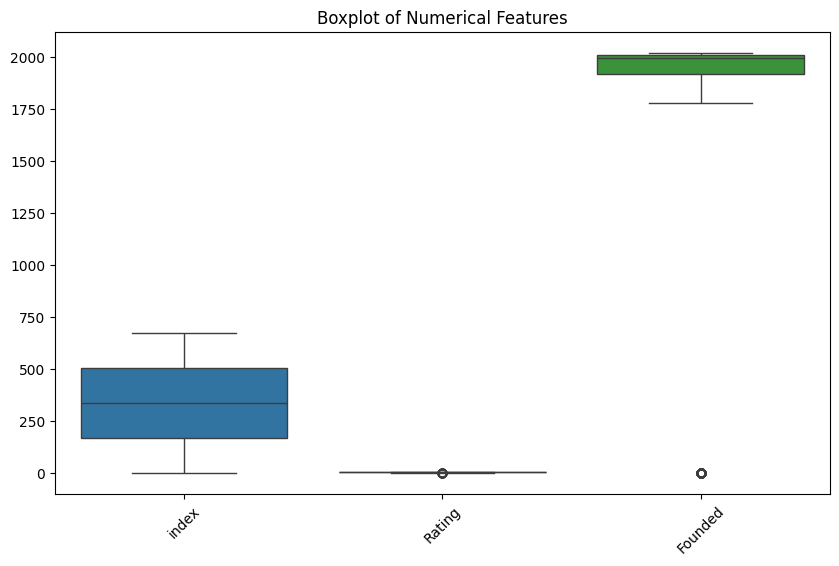

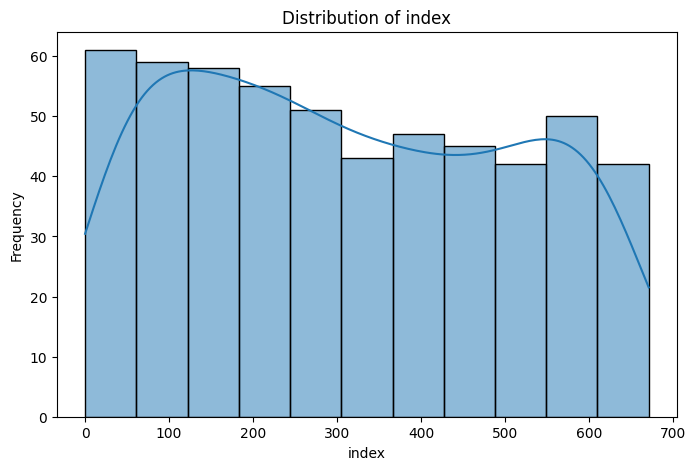

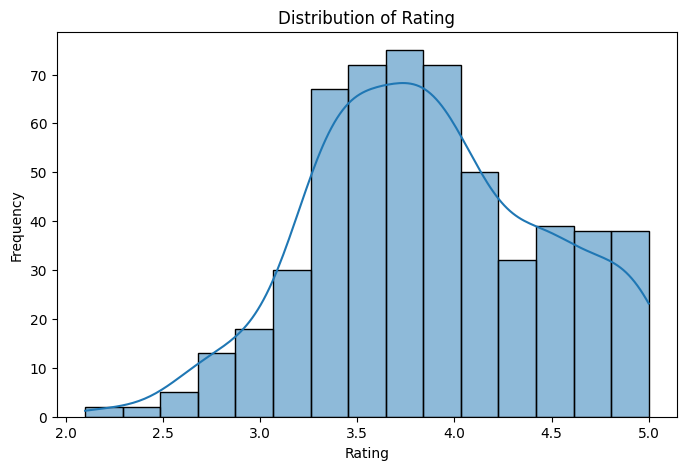

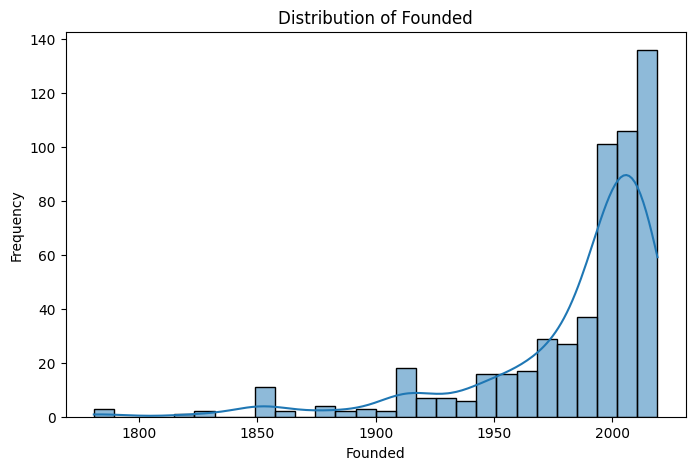

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the dataset
df = pd.read_csv("glassdoor.csv")  # Update 'your_dataset.csv' with your dataset file name

# List the categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

# Identify the percentage of missing values
missing_categorical = df[categorical_features].isnull().mean() * 100
missing_numerical = df[numerical_features].isnull().mean() * 100

print("\nPercentage of missing values in categorical features:")
print(missing_categorical)
print("\nPercentage of missing values in numerical features:")
print(missing_numerical)

# Examine the spread of numerical data and identify outliers using Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_features])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

# Handle outliers using IQR
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers
df_cleaned = df[~outliers]

# Distribution plot
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_cleaned[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

In [8]:
# Read File and assign a variable to DataFrame.

import pandas as pd

csv_file = 'glassdoor.csv'

df = pd.read_csv(csv_file)

df

index          Job Title               Salary Estimate  \
0        0  Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1        1     Data Scientist  $137K-$171K (Glassdoor est.)   
2        2     Data Scientist  $137K-$171K (Glassdoor est.)   
3        3     Data Scientist  $137K-$171K (Glassdoor est.)   
4        4     Data Scientist  $137K-$171K (Glassdoor est.)   
..     ...                ...                           ...   
667    667     Data Scientist  $105K-$167K (Glassdoor est.)   
668    668     Data Scientist  $105K-$167K (Glassdoor est.)   
669    669     Data Scientist  $105K-$167K (Glassdoor est.)   
670    670     Data Scientist  $105K-$167K (Glassdoor est.)   
671    671     Data Scientist  $105K-$167K (Glassdoor est.)   

                                       Job Description  Rating  \
0    Description\n\nThe Senior Data Scientist is re...     3.1   
1    Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2    Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3    JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4    Data Scientist\nAffinity Solutions / Marketing...     2.9   
..                                                 ...     ...   
667  Summary\n\nWe’re looking for a data scientist ...     3.6   
668  Job Description\nBecome a thought leader withi...    -1.0   
669  Join a thriving company that is changing the w...    -1.0   
670  100 Remote Opportunity As an AINLP Data Scient...     5.0   
671  Description\n\nThe Data Scientist will be part...     2.7   

                  Company Name           Location            Headquarters  \
0             Healthfirst\n3.1       New York, NY            New York, NY   
1                 ManTech\n4.2      Chantilly, VA             Herndon, VA   
2          Analysis Group\n3.8         Boston, MA              Boston, MA   
3                 INFICON\n3.5         Newton, MA  Bad Ragaz, Switzerland   
4      Affinity Solutions\n2.9       New York, NY            New York, NY   
..                         ...                ...                     ...   
667              TRANZACT\n3.6       Fort Lee, NJ            Fort Lee, NJ   
668                       JKGT  San Francisco, CA                      -1   
669                 AccessHope      Irwindale, CA                      -1   
670  ChaTeck Incorporated\n5.0  San Francisco, CA         Santa Clara, CA   
671         1-800-Flowers\n2.7       New York, NY         Carle Place, NY   

                        Size  Founded        Type of ownership  \
0     1001 to 5000 employees     1993   Nonprofit Organization   
1    5001 to 10000 employees     1968         Company - Public   
2     1001 to 5000 employees     1981  Private Practice / Firm   
3      501 to 1000 employees     2000         Company - Public   
4        51 to 200 employees     1998        Company - Private   
..                       ...      ...                      ...   
667   1001 to 5000 employees     1989        Company - Private   
668                       -1       -1                       -1   
669                       -1       -1                       -1   
670        1 to 50 employees       -1        Company - Private   
671   1001 to 5000 employees     1976         Company - Public   

                                  Industry             Sector  \
0                       Insurance Carriers          Insurance   
1                   Research & Development  Business Services   
2                               Consulting  Business Services   
3    Electrical & Electronic Manufacturing      Manufacturing   
4                  Advertising & Marketing  Business Services   
..                                     ...                ...   
667                Advertising & Marketing  Business Services   
668                                     -1                 -1   
669                                     -1                 -1   
670                Advertising & Marketing  Business Services   
671                   

In [9]:
#Fast checking the data types of my DataFrame.

df.dtypes

index                  int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

**2. Data Cleaning: We will check column by column that there are no errors and we will also work on some data as needed.**

* Column Job Title: We will verify that there are no values with error.

In [10]:
# Check for errors or NaN values in the column 'Job Title'.
errors_or_nan_in_job_titles = df['Job Title'].isnull().sum()
errors_or_nan_in_job_titles


0

* Column Salary Estimate: We will simplify the data so that we can categorize or analyze it appropriately.


In [11]:
# Verification of salary values
unique_salary = df['Salary Estimate'].unique()
unique_salary

array(['$137K-$171K (Glassdoor est.)', '$75K-$131K (Glassdoor est.)',
       '$79K-$131K (Glassdoor est.)', '$99K-$132K (Glassdoor est.)',
       '$90K-$109K (Glassdoor est.)', '$101K-$165K (Glassdoor est.)',
       '$56K-$97K (Glassdoor est.)', '$79K-$106K (Glassdoor est.)',
       '$71K-$123K (Glassdoor est.)', '$90K-$124K (Glassdoor est.)',
       '$91K-$150K (Glassdoor est.)', '$141K-$225K (Glassdoor est.)',
       '$145K-$225K(Employer est.)', '$79K-$147K (Glassdoor est.)',
       '$122K-$146K (Glassdoor est.)', '$112K-$116K (Glassdoor est.)',
       '$110K-$163K (Glassdoor est.)', '$124K-$198K (Glassdoor est.)',
       '$79K-$133K (Glassdoor est.)', '$69K-$116K (Glassdoor est.)',
       '$31K-$56K (Glassdoor est.)', '$95K-$119K (Glassdoor est.)',
       '$212K-$331K (Glassdoor est.)', '$66K-$112K (Glassdoor est.)',
       '$128K-$201K (Glassdoor est.)', '$138K-$158K (Glassdoor est.)',
       '$80K-$132K (Glassdoor est.)', '$87K-$141K (Glassdoor est.)',
       '$92K-$155K (Glassdo

In [12]:
# Replacing the values "$", "K", and " (Glassdoor est.)" by empty in the column "Salary Estimate".
df['Salary Estimate'] = df['Salary Estimate'].replace({'\$': '', 'K': '', ' \(Glassdoor est.\)': '','(Employer est.)':''}, regex=True)

# Showing the first records to verify the changes
unique_salary = df['Salary Estimate'].unique()
unique_salary

array(['137-171', '75-131', '79-131', '99-132', '90-109', '101-165',
       '56-97', '79-106', '71-123', '90-124', '91-150', '141-225',
       '145-225()', '79-147', '122-146', '112-116', '110-163', '124-198',
       '79-133', '69-116', '31-56', '95-119', '212-331', '66-112',
       '128-201', '138-158', '80-132', '87-141', '92-155', '105-167'],
      dtype=object)

* Column Job Description: We will verify that there are no values with error.

In [13]:
# Check for errors or NaN values in the column 'Job Description'.
errors_or_nan_in_job_description = df['Job Description'].isnull().sum()
errors_or_nan_in_job_description

0

* Column Rating: We will transform those negative data into 0.

In [14]:
# Setting the values of the 'Rating' column less than 0 equal to 0
df['Rating'] = df['Rating'].apply(lambda x: 0 if x < 0 else x)

unique_rating = df['Rating'].unique()
unique_rating

array([3.1, 4.2, 3.8, 3.5, 2.9, 3.9, 4.4, 3.6, 4.5, 4.7, 3.7, 3.4, 4.1,
       3.2, 4.3, 2.8, 5. , 4.8, 3.3, 2.7, 2.2, 2.6, 4. , 2.5, 4.9, 2.4,
       0. , 2.3, 4.6, 3. , 2.1, 2. ])

* Column Company Name: We will simplify the data so that we can categorize or analyze it appropriately.

In [15]:
# Get unique values from the column 'Company Name'.
unique_company = df['Company Name'].unique()

# Showing the first 10 unique values as an example
unique_company[:10]


array(['Healthfirst\n3.1', 'ManTech\n4.2', 'Analysis Group\n3.8',
       'INFICON\n3.5', 'Affinity Solutions\n2.9', 'HG Insights\n4.2',
       'Novartis\n3.9', 'iRobot\n3.5', 'Intuit - Data\n4.4',
       'XSELL Technologies\n3.6'], dtype=object)

In [16]:
# Function to clear the 'Company Name' column and delete everything after "\n".
def clean_company_name(company_name):
    if "\n" in company_name:
        return company_name.split("\n")[0]
    else:
        return company_name

# Applying the function to the column 'Company Name'.
df['Company Name'] = df['Company Name'].apply(clean_company_name)

# Get unique values from the column 'Company Name'.
unique_company = df['Company Name'].unique()

# Showing the first 10 unique values as an example
unique_company[:10]



array(['Healthfirst', 'ManTech', 'Analysis Group', 'INFICON',
       'Affinity Solutions', 'HG Insights', 'Novartis', 'iRobot',
       'Intuit - Data', 'XSELL Technologies'], dtype=object)

* Column Location:  We will verify that there are no values with error.

In [17]:
errors_or_nan_in_location = df['Location'].isnull().sum()
errors_or_nan_in_location

0

* Column Headquarters:  We will verify that there are no values with error.

In [18]:
errors_or_nan_in_location = df['Headquarters'].isnull().sum()
errors_or_nan_in_location

0

* Column Size:  In this case we will replace invalid values by Error, there was a possibility to replace them by mode, but without a concrete reason it would not be a good idea.

In [19]:
# Get unique values from the 'Size' column
unique_size = df['Size'].unique()
unique_size

array(['1001 to 5000 employees', '5001 to 10000 employees',
       '501 to 1000 employees', '51 to 200 employees', '10000+ employees',
       '201 to 500 employees', '1 to 50 employees', '-1', 'Unknown'],
      dtype=object)

In [20]:
# Replacing the values "-1" and "Unknown" by NaN in the column 'Size'.
df['Size'] = df['Size'].replace(['-1', 'Unknown'], pd.NA)
# Get unique values from the 'Size' column
unique_size = df['Size'].unique()
unique_size

array(['1001 to 5000 employees', '5001 to 10000 employees',
       '501 to 1000 employees', '51 to 200 employees', '10000+ employees',
       '201 to 500 employees', '1 to 50 employees', <NA>], dtype=object)

* Column Founded:  In this case we will replace invalid values by Error, there was a possibility to replace them by mode, but without a concrete reason it would not be a good idea.

In [21]:
# Get unique values from the 'Size' column
unique_founded = df['Founded'].unique()
unique_founded

array([1993, 1968, 1981, 2000, 1998, 2010, 1996, 1990, 1983, 2014, 2012,
       2016, 1965, 1973, 1986, 1997, 2015, 1945, 1988, 2017, 2011, 1967,
       1860, 1992, 2003, 1951, 2005, 2019, 1925, 2008, 1999, 1978, 1966,
       1912, 1958, 2013, 1849, 1781, 1926, 2006, 1994, 1863, 1995,   -1,
       1982, 1974, 2001, 1985, 1913, 1971, 1911, 2009, 1959, 2007, 1939,
       2002, 1961, 1963, 1969, 1946, 1957, 1953, 1948, 1850, 1851, 2004,
       1976, 1918, 1954, 1947, 1955, 2018, 1937, 1917, 1935, 1929, 1820,
       1952, 1932, 1894, 1960, 1788, 1830, 1984, 1933, 1880, 1887, 1970,
       1942, 1980, 1989, 1908, 1853, 1875, 1914, 1898, 1956, 1977, 1987,
       1896, 1972, 1949, 1962], dtype=int64)

In [22]:
# Replacing the values "-1" by NaN in the column 'Founded'.
df['Founded'] = df['Founded'].replace([-1], pd.NA)
# Get unique values from the 'Founded' column
unique_founded = df['Founded'].unique()
unique_founded

array([1993, 1968, 1981, 2000, 1998, 2010, 1996, 1990, 1983, 2014, 2012,
       2016, 1965, 1973, 1986, 1997, 2015, 1945, 1988, 2017, 2011, 1967,
       1860, 1992, 2003, 1951, 2005, 2019, 1925, 2008, 1999, 1978, 1966,
       1912, 1958, 2013, 1849, 1781, 1926, 2006, 1994, 1863, 1995, <NA>,
       1982, 1974, 2001, 1985, 1913, 1971, 1911, 2009, 1959, 2007, 1939,
       2002, 1961, 1963, 1969, 1946, 1957, 1953, 1948, 1850, 1851, 2004,
       1976, 1918, 1954, 1947, 1955, 2018, 1937, 1917, 1935, 1929, 1820,
       1952, 1932, 1894, 1960, 1788, 1830, 1984, 1933, 1880, 1887, 1970,
       1942, 1980, 1989, 1908, 1853, 1875, 1914, 1898, 1956, 1977, 1987,
       1896, 1972, 1949, 1962], dtype=object)

* Column Type of Ownership:  In this case we will replace invalid values by Error, there was a possibility to replace them by mode, but without a concrete reason it would not be a good idea.

In [23]:
# Get unique values from the 'Size' column
unique_founded = df['Type of ownership'].unique()
unique_founded

array(['Nonprofit Organization', 'Company - Public',
       'Private Practice / Firm', 'Company - Private', 'Government',
       'Subsidiary or Business Segment', 'Other Organization', '-1',
       'Unknown', 'Hospital', 'Self-employed', 'College / University',
       'Contract'], dtype=object)

In [24]:
# Replacing the values "-1" by NaN in the column 'Founded'.
df['Type of ownership'] = df['Type of ownership'].replace(['-1'], pd.NA)
# Get unique values from the 'Founded' column
unique_type = df['Type of ownership'].unique()
unique_type 

array(['Nonprofit Organization', 'Company - Public',
       'Private Practice / Firm', 'Company - Private', 'Government',
       'Subsidiary or Business Segment', 'Other Organization', <NA>,
       'Unknown', 'Hospital', 'Self-employed', 'College / University',
       'Contract'], dtype=object)

* Column Industry:  In this case we will replace invalid values by Error, there was a possibility to replace them by mode, but without a concrete reason it would not be a good idea.

In [25]:
# Get unique values from the 'Size' column
unique_industry = df['Industry'].unique()
unique_industry

array(['Insurance Carriers', 'Research & Development', 'Consulting',
       'Electrical & Electronic Manufacturing', 'Advertising & Marketing',
       'Computer Hardware & Software', 'Biotech & Pharmaceuticals',
       'Consumer Electronics & Appliances Stores',
       'Enterprise Software & Network Solutions', 'IT Services', 'Energy',
       'Chemical Manufacturing', 'Federal Agencies', 'Internet',
       'Health Care Services & Hospitals',
       'Investment Banking & Asset Management', 'Aerospace & Defense',
       'Utilities', '-1', 'Express Delivery Services',
       'Staffing & Outsourcing', 'Insurance Agencies & Brokerages',
       'Consumer Products Manufacturing', 'Industrial Manufacturing',
       'Food & Beverage Manufacturing', 'Banks & Credit Unions',
       'Video Games', 'Shipping', 'Telecommunications Services',
       'Lending', 'Cable, Internet & Telephone Providers', 'Real Estate',
       'Venture Capital & Private Equity', 'Miscellaneous Manufacturing',
       'Oil 

In [26]:
# Replacing the values "-1" by NaN in the column 'Industry'.
df['Industry'] = df['Industry'].replace(['-1'], pd.NA)
# Get unique values from the 'Industry' column
unique_industry = df['Industry'].unique()
unique_industry

array(['Insurance Carriers', 'Research & Development', 'Consulting',
       'Electrical & Electronic Manufacturing', 'Advertising & Marketing',
       'Computer Hardware & Software', 'Biotech & Pharmaceuticals',
       'Consumer Electronics & Appliances Stores',
       'Enterprise Software & Network Solutions', 'IT Services', 'Energy',
       'Chemical Manufacturing', 'Federal Agencies', 'Internet',
       'Health Care Services & Hospitals',
       'Investment Banking & Asset Management', 'Aerospace & Defense',
       'Utilities', <NA>, 'Express Delivery Services',
       'Staffing & Outsourcing', 'Insurance Agencies & Brokerages',
       'Consumer Products Manufacturing', 'Industrial Manufacturing',
       'Food & Beverage Manufacturing', 'Banks & Credit Unions',
       'Video Games', 'Shipping', 'Telecommunications Services',
       'Lending', 'Cable, Internet & Telephone Providers', 'Real Estate',
       'Venture Capital & Private Equity', 'Miscellaneous Manufacturing',
       'Oil 

* Column Sector:  In this case we will replace invalid values by Error, there was a possibility to replace them by mode, but without a concrete reason it would not be a good idea.

In [27]:
# Get unique values ​​from 'Job Title' column
unique_Sector = df['Sector'].unique()
unique_Sector

array(['Insurance', 'Business Services', 'Manufacturing',
       'Information Technology', 'Biotech & Pharmaceuticals', 'Retail',
       'Oil, Gas, Energy & Utilities', 'Government', 'Health Care',
       'Finance', 'Aerospace & Defense', '-1',
       'Transportation & Logistics', 'Media', 'Telecommunications',
       'Real Estate', 'Travel & Tourism', 'Agriculture & Forestry',
       'Education', 'Accounting & Legal', 'Non-Profit',
       'Construction, Repair & Maintenance', 'Consumer Services'],
      dtype=object)

In [28]:
# Replacing the values "-1" by NaN in the column 'Industry'.
df['Sector'] = df['Sector'].replace(['-1'], pd.NA)
# Get unique values from the 'Industry' column
unique_Sector = df['Sector'].unique()
unique_Sector

array(['Insurance', 'Business Services', 'Manufacturing',
       'Information Technology', 'Biotech & Pharmaceuticals', 'Retail',
       'Oil, Gas, Energy & Utilities', 'Government', 'Health Care',
       'Finance', 'Aerospace & Defense', <NA>,
       'Transportation & Logistics', 'Media', 'Telecommunications',
       'Real Estate', 'Travel & Tourism', 'Agriculture & Forestry',
       'Education', 'Accounting & Legal', 'Non-Profit',
       'Construction, Repair & Maintenance', 'Consumer Services'],
      dtype=object)

* Column Revenue:  In this case we will replace invalid values by Error, there was a possibility to replace them by mode, but without a concrete reason it would not be a good idea.

In [29]:
# Get unique values ​​from 'Job Title' column
unique_Revenue = df['Revenue'].unique()
unique_Revenue

array(['Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$100 to $500 million (USD)', '$10+ billion (USD)',
       '$2 to $5 billion (USD)', '$500 million to $1 billion (USD)',
       '$5 to $10 billion (USD)', '$10 to $25 million (USD)',
       '$25 to $50 million (USD)', '$50 to $100 million (USD)',
       '$1 to $5 million (USD)', '$5 to $10 million (USD)',
       'Less than $1 million (USD)', '-1'], dtype=object)

In [30]:
# Replacing the values "-1" by NaN in the column 'Industry'.
df['Revenue'] = df['Revenue'].replace(['-1'], pd.NA)
# Get unique values from the 'Industry' column
unique_Revenue = df['Revenue'].unique()
unique_Revenue

array(['Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$100 to $500 million (USD)', '$10+ billion (USD)',
       '$2 to $5 billion (USD)', '$500 million to $1 billion (USD)',
       '$5 to $10 billion (USD)', '$10 to $25 million (USD)',
       '$25 to $50 million (USD)', '$50 to $100 million (USD)',
       '$1 to $5 million (USD)', '$5 to $10 million (USD)',
       'Less than $1 million (USD)', <NA>], dtype=object)

* Column Competitors:  In this case we will replace invalid values by Error, there was a possibility to replace them by mode, but without a concrete reason it would not be a good idea.

In [31]:
# Let's show the unique values ​​in the 'Competitors' column of DataFrame df1
unique_Competitors = df['Competitors'].unique()
unique_Competitors[:10]


array(['EmblemHealth, UnitedHealth Group, Aetna', '-1',
       'MKS Instruments, Pfeiffer Vacuum, Agilent Technologies',
       'Commerce Signals, Cardlytics, Yodlee',
       'Square, PayPal, H&R Block',
       'Leidos, CACI International, Booz Allen Hamilton',
       'Slalom, Daugherty Business Solutions',
       'Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory',
       'CDW, PCM, SHI International',
       'Crossix Solutions Inc., AppNexus, The Trade Desk'], dtype=object)

In [32]:
# Replacing the values "-1" by NaN in the column 'Competitors'.
df['Competitors'] = df['Competitors'].replace(['-1'], pd.NA)
# Get unique values from the 'Industry' column
unique_Competitors = df['Competitors'].unique()
unique_Competitors[:10]

array(['EmblemHealth, UnitedHealth Group, Aetna', <NA>,
       'MKS Instruments, Pfeiffer Vacuum, Agilent Technologies',
       'Commerce Signals, Cardlytics, Yodlee',
       'Square, PayPal, H&R Block',
       'Leidos, CACI International, Booz Allen Hamilton',
       'Slalom, Daugherty Business Solutions',
       'Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory',
       'CDW, PCM, SHI International',
       'Crossix Solutions Inc., AppNexus, The Trade Desk'], dtype=object)

**3. Data Transformation: We will check column by column that there are no errors and we will also work on some data as needed.**


In [33]:
# Additional cleanup is needed to handle cases such as "225()".
df['Salary Estimate'] = df['Salary Estimate'].str.extract('(\d+-\d+)')

# Now we try again the conversion to numeric
df[['Salary Min', 'Salary Max']] = df['Salary Estimate'].str.split('-', expand=True).apply(pd.to_numeric, errors='coerce')

# Calculate the average salary
df['Salary Avg'] = (df['Salary Min'] + df['Salary Max']) / 2

df['Salary Avg'] = df['Salary Avg'].astype(int)

# Showing the first records to check the calculations
df[['Salary Min', 'Salary Max', 'Salary Avg']].head()


Salary Min  Salary Max  Salary Avg
0         137         171         154
1         137         171         154
2         137         171         154
3         137         171         154
4         137         171         154

In [34]:
# In addition, I will show a sample of the rows where 'Salary Avg' is null to validate that there are no errors.
sample_of_null_job_salary = df[df['Salary Avg'].isnull()]
sample_of_null_job_salary

Empty DataFrame
Columns: [index, Job Title, Salary Estimate, Job Description, Rating, Company Name, Location, Headquarters, Size, Founded, Type of ownership, Industry, Sector, Revenue, Competitors, Salary Min, Salary Max, Salary Avg]
Index: []

In [35]:
# Creating a function to handle special constraints and assign status values
def assign_job_state(location):
    if location == "United States":
        return "Across US"
    elif location == "Utah":
        return "UT"
    elif location == "New Jersey":
        return "NJ"
    elif location == "Texas":
        return "TX"
    elif location == "Remote":
        return "Remote"
    elif location == "California":
        return "CA"
    else:
        # Use regular expression to extract the state of locations in the format "City, State".
        state = pd.Series(location).str.extract(',\s*(\w\w)$').iloc[0, 0]
        return state if pd.notna(state) else "Unknown"

# Applying the function to the 'Location' column to create 'job_state'.
df['job_state'] = df['Location'].apply(assign_job_state)

# Showing the first records to verify the changes
df[['Location', 'job_state']].head()


Location job_state
0   New York, NY        NY
1  Chantilly, VA        VA
2     Boston, MA        MA
3     Newton, MA        MA
4   New York, NY        NY

In [36]:
# Checking for null values in column 'same_state'.
null_values_in_job_state = df['job_state'].isnull().sum()
null_values_in_job_state


0

In [37]:
# Creating a new column 'hq_state' to extract the status of 'Headquarters'.
df['hq_state'] = df['Headquarters'].apply(assign_job_state)

# Creating the column 'same_state' comparing 'job_state' and 'hq_state'.
df['same_state'] = (df['job_state'] == df['hq_state']).astype(int)

# Showing the first records to verify the changes
df[['Location', 'job_state', 'Headquarters', 'hq_state', 'same_state']].head()


Location job_state            Headquarters hq_state  same_state
0   New York, NY        NY            New York, NY       NY           1
1  Chantilly, VA        VA             Herndon, VA       VA           1
2     Boston, MA        MA              Boston, MA       MA           1
3     Newton, MA        MA  Bad Ragaz, Switzerland  Unknown           0
4   New York, NY        NY            New York, NY       NY           1

In [38]:
# Checking for null values in column 'same_state'.
null_values_in_same_state = df['same_state'].isnull().sum()
null_values_in_same_state


0

In [39]:
from collections import Counter
import re

# List of common English words for exclude
common_words_to_exclude = set(['and', 'to', 'the', 'of', 'in', 'a', 'with', 'for', 'or', 'our', 'is', 'we', 'you', 'as', 'on', 
                               'will', 'are', 'that', 'an', 'be', 's', 'at', 'have', 'this', 'from', 'by', 'other', 'all', 'your', 
                               'using', 'such', 'more', 'about', 'it', 'their', 'us', 'not', 'but', 'can', 'who', 'them', 'its', 
                               'also', 'has', 'any', 'into', 'do', 'up', 'out', 'so', 'like', 'if', 'how', 'just', 'which', 'what', 
                               'some', 'only', 'one', 'no', 'new', 'when', 'here', 'where', 'why', 'would', 'should', 'over', 
                               'these', 'than', 'then', 'now'])

# Joining all job descriptions into a single text string
all_descriptions = ' '.join(df['Job Description'])

# Clearing the text string: removing non-alphabetic characters and converting to lower case
cleaned_descriptions = re.sub(r'\W+', ' ', all_descriptions).lower()

# Dividing the string into individual words and excluding common words.
words = [word for word in cleaned_descriptions.split() if word not in common_words_to_exclude]

# Counting the frequency of each word.
word_counts = Counter(words)

# Obtaining the 100 most common words
most_common_words = word_counts.most_common(100)

most_common_words

[('data', 7370),
 ('experience', 3395),
 ('work', 1564),
 ('science', 1519),
 ('learning', 1480),
 ('business', 1424),
 ('team', 1369),
 ('machine', 1231),
 ('skills', 1209),
 ('analysis', 992),
 ('analytics', 925),
 ('development', 917),
 ('models', 888),
 ('ability', 887),
 ('years', 815),
 ('solutions', 812),
 ('engineering', 779),
 ('tools', 760),
 ('knowledge', 756),
 ('technical', 745),
 ('scientist', 739),
 ('company', 735),
 ('working', 716),
 ('systems', 694),
 ('information', 673),
 ('support', 667),
 ('job', 653),
 ('python', 646),
 ('strong', 642),
 ('software', 639),
 ('develop', 618),
 ('statistical', 617),
 ('computer', 614),
 ('design', 596),
 ('including', 594),
 ('research', 589),
 ('required', 585),
 ('related', 576),
 ('opportunity', 564),
 ('techniques', 540),
 ('degree', 540),
 ('product', 526),
 ('management', 515),
 ('requirements', 505),
 ('technology', 505),
 ('environment', 504),
 ('insights', 494),
 ('advanced', 476),
 ('position', 473),
 ('time', 473),
 ('a

In [40]:
# List of keywords to search for
keywords = ["machine learning", "python", "sql", "excel", "hadoop", "spark", "aws", "tableau", "power bi", "big data"]

# Creating the columns for each keyword
for keyword in keywords:
    column_name = keyword.replace(" ", "_")
    df[column_name] = df['Job Description'].str.contains(keyword, case=False, na=False).astype(int)

# Showing the first records to verify the changes
df.head()

index          Job Title Salary Estimate  \
0      0  Sr Data Scientist         137-171   
1      1     Data Scientist         137-171   
2      2     Data Scientist         137-171   
3      3     Data Scientist         137-171   
4      4     Data Scientist         137-171   

                                     Job Description  Rating  \
0  Description\n\nThe Senior Data Scientist is re...     3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3  JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

         Company Name       Location            Headquarters  \
0         Healthfirst   New York, NY            New York, NY   
1             ManTech  Chantilly, VA             Herndon, VA   
2      Analysis Group     Boston, MA              Boston, MA   
3             INFICON     Newton, MA  Bad Ragaz, Switzerland   
4  Affinity Solutions   New York, NY            New York, NY   

                      Size Founded  ... machine_learning python sql excel  \
0   1001 to 5000 employees    1993  ...                1      0   0     0   
1  5001 to 10000 employees    1968  ...                1      0   1     0   
2   1001 to 5000 employees    1981  ...                1      1   0     1   
3    501 to 1000 employees    2000  ...                1      1   1     1   
4      51 to 200 employees    1998  ...                1      1   1     1   

  hadoop  spark  aws  tableau power_bi big_data  
0      0      0    1        0        0        0  
1      1      0    0        0        0        1  
2      0      0    1        0        0        0  
3      0      0    1        0        0        0  
4      0      0    0        0        0        0  

[5 rows x 31 columns]

In [41]:
# Creating the column 'job_simp' based on the presence of certain words in 'Job Title'.

def simplify_job_title(title):
    if "engineer" in title.lower():
        return "Data Engineer"
    elif "scientist" in title.lower():
        return "Data Scientist"
    elif "analyst" in title.lower():
        return "Data Analyst"
    elif "manager" in title.lower():
        return "Manager"
    elif "director" in title.lower():
        return "Director"
    else:
        return pd.NA

# Applying the function to the column 'Job Title'.
df['job_simp'] = df['Job Title'].apply(simplify_job_title)

# Showing the first records to verify the changes
df[['Job Title', 'job_simp']].head()

Job Title        job_simp
0  Sr Data Scientist  Data Scientist
1     Data Scientist  Data Scientist
2     Data Scientist  Data Scientist
3     Data Scientist  Data Scientist
4     Data Scientist  Data Scientist

In [42]:
# Trying again to create 'seniority' column
def determine_seniority(title):
    if "senior" in title.lower() or "sr" in title.lower():
        return 1
    else:
        return 0

df['seniority'] = df['Job Title'].apply(determine_seniority)

# Showing first logs to verify changes
df[['Job Title', 'seniority']].head()


Job Title  seniority
0  Sr Data Scientist          1
1     Data Scientist          0
2     Data Scientist          0
3     Data Scientist          0
4     Data Scientist          0

In [43]:
# Creating the column 'seniority'.
def determine_seniority(title):
    if "senior" in title.lower() or "sr" in title.lower():
        return 1
    else:
        return 0

df['seniority'] = df['Job Title'].apply(determine_seniority)

# Showing the first records to verify the changes
df[['Job Title', 'seniority']].head()

Job Title  seniority
0  Sr Data Scientist          1
1     Data Scientist          0
2     Data Scientist          0
3     Data Scientist          0
4     Data Scientist          0

In [44]:
df

index          Job Title Salary Estimate  \
0        0  Sr Data Scientist         137-171   
1        1     Data Scientist         137-171   
2        2     Data Scientist         137-171   
3        3     Data Scientist         137-171   
4        4     Data Scientist         137-171   
..     ...                ...             ...   
667    667     Data Scientist         105-167   
668    668     Data Scientist         105-167   
669    669     Data Scientist         105-167   
670    670     Data Scientist         105-167   
671    671     Data Scientist         105-167   

                                       Job Description  Rating  \
0    Description\n\nThe Senior Data Scientist is re...     3.1   
1    Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2    Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3    JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4    Data Scientist\nAffinity Solutions / Marketing...     2.9   
..                                                 ...     ...   
667  Summary\n\nWe’re looking for a data scientist ...     3.6   
668  Job Description\nBecome a thought leader withi...     0.0   
669  Join a thriving company that is changing the w...     0.0   
670  100 Remote Opportunity As an AINLP Data Scient...     5.0   
671  Description\n\nThe Data Scientist will be part...     2.7   

             Company Name           Location            Headquarters  \
0             Healthfirst       New York, NY            New York, NY   
1                 ManTech      Chantilly, VA             Herndon, VA   
2          Analysis Group         Boston, MA              Boston, MA   
3                 INFICON         Newton, MA  Bad Ragaz, Switzerland   
4      Affinity Solutions       New York, NY            New York, NY   
..                    ...                ...                     ...   
667              TRANZACT       Fort Lee, NJ            Fort Lee, NJ   
668                  JKGT  San Francisco, CA                      -1   
669            AccessHope      Irwindale, CA                      -1   
670  ChaTeck Incorporated  San Francisco, CA         Santa Clara, CA   
671         1-800-Flowers       New York, NY         Carle Place, NY   

                        Size Founded  ... sql excel hadoop spark aws  tableau  \
0     1001 to 5000 employees    1993  ...   0     0      0     0   1        0   
1    5001 to 10000 employees    1968  ...   1     0      1     0   0        0   
2     1001 to 5000 employees    1981  ...   0     1      0     0   1        0   
3      501 to 1000 employees    2000  ...   1     1      0     0   1        0   
4        51 to 200 employees    1998  ...   1     1      0     0   0        0   
..                       ...     ...  ...  ..   ...    ...   ...  ..      ...   
667   1001 to 5000 employees    1989  ...   1     1      1     0   0        1   
668                     <NA>    <NA>  ...   0     0      0     0   0        0   
669                     <NA>    <NA>  ...   1     1      1     0   0        1   
670        1 to 50 employees    <NA>  ...   1     0      1     1   0        0   
671   1001 to 5000 employees    1976  ...   1     1      0     0   0        1   

     power_bi  big_data        job_simp seniority  
0           0         0  Data Scientist         1  
1           0         1  Data Scientist         0  
2           0         0  Data Scientist         0  
3           0         0  Data Scientist         0  
4           0         0  Data Scientist         0  
..        ...       ...             ...       ...  
667         1         1  Data Scientist         0  
668         0         0  Data Scientist         0  
669         1         0  Data Scientist         0  
670         0         1  Data Scientist         0  
671         0         0  Data Scientist         0  

[672 rows x 33 columns]

In [45]:
df.to_csv("glassdoor2.csv")

Categorical Features: ['Job Title', 'Salary Estimate', 'Job Description', 'Company Name', 'Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 'job_state', 'hq_state', 'job_simp']
Numerical Features: ['index', 'Rating', 'Founded', 'Salary Min', 'Salary Max', 'Salary Avg', 'same_state', 'machine_learning', 'python', 'sql', 'excel', 'hadoop', 'spark', 'aws', 'tableau', 'power_bi', 'big_data', 'seniority']

Percentage of missing values in categorical features:
Job Title             0.000000
Salary Estimate       0.000000
Job Description       0.000000
Company Name          0.000000
Location              0.000000
Headquarters          0.000000
Size                  6.547619
Type of ownership     4.017857
Industry             10.565476
Sector               10.565476
Revenue               4.017857
Competitors          74.553571
job_state             0.000000
hq_state              0.000000
job_simp              1.934524
dtype: float64

Perce

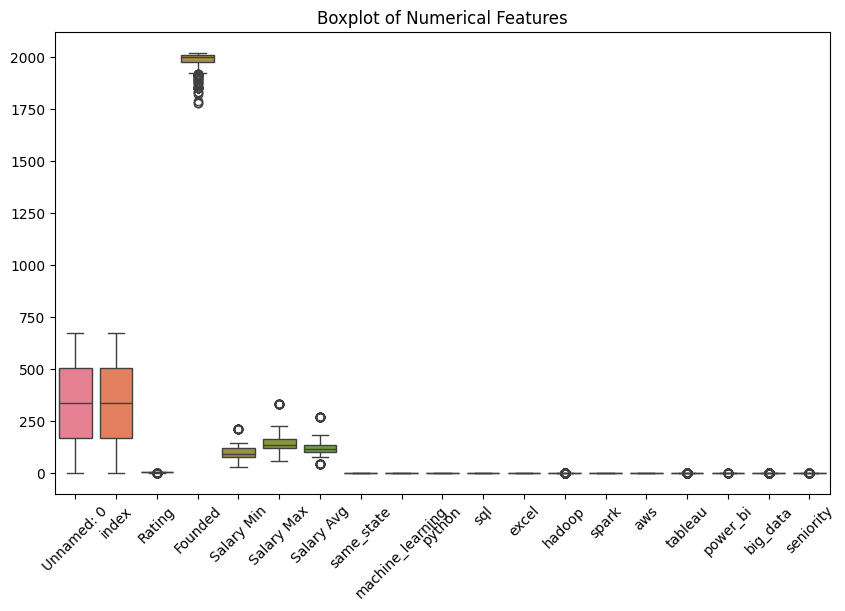

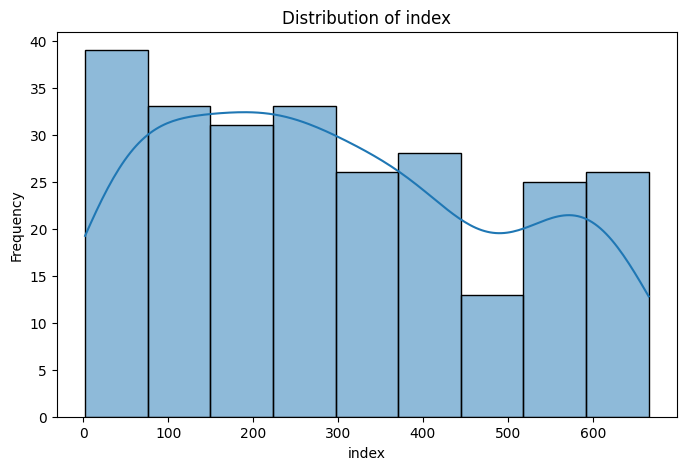

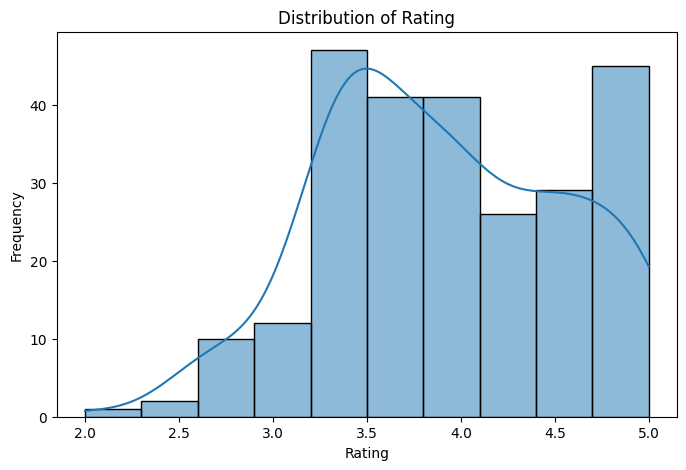

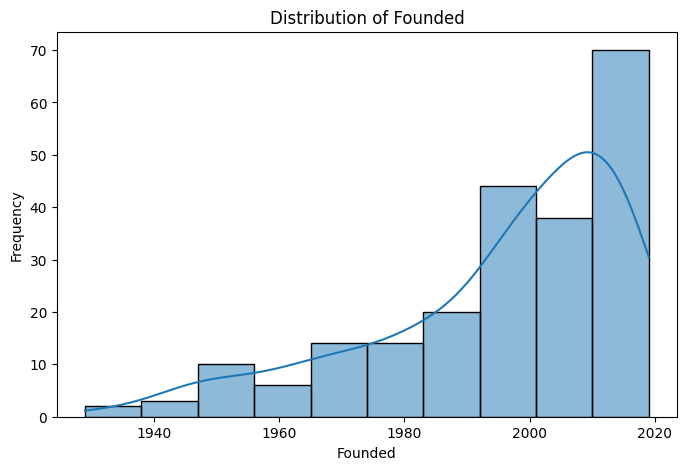

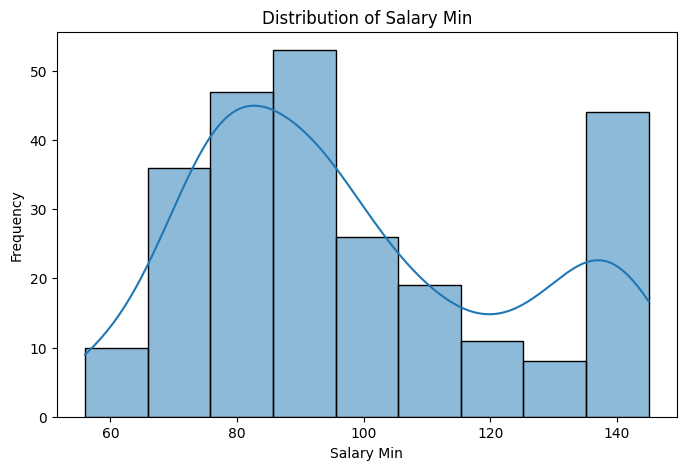

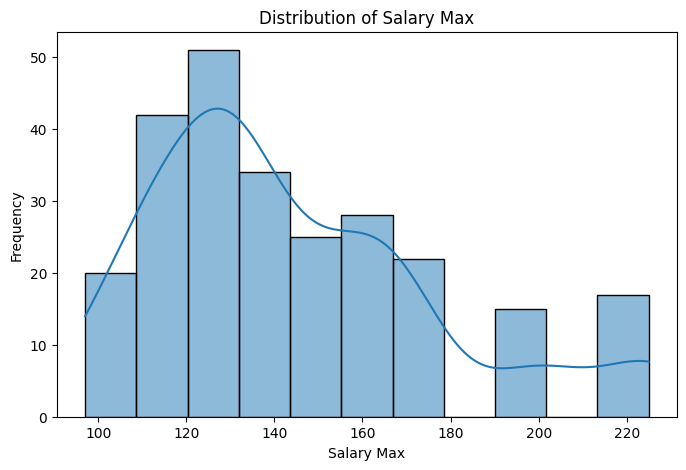

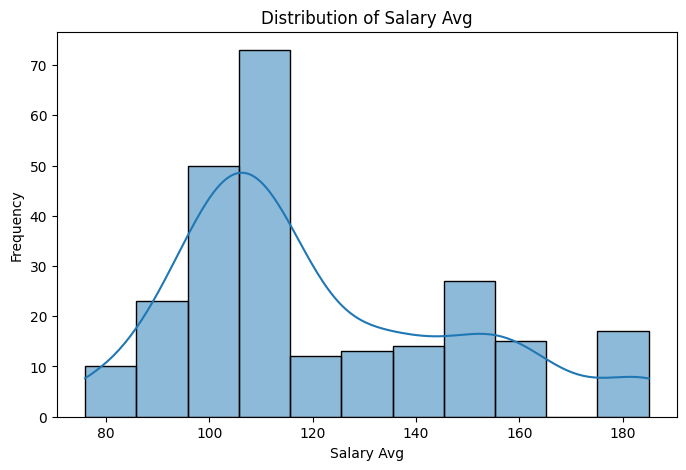

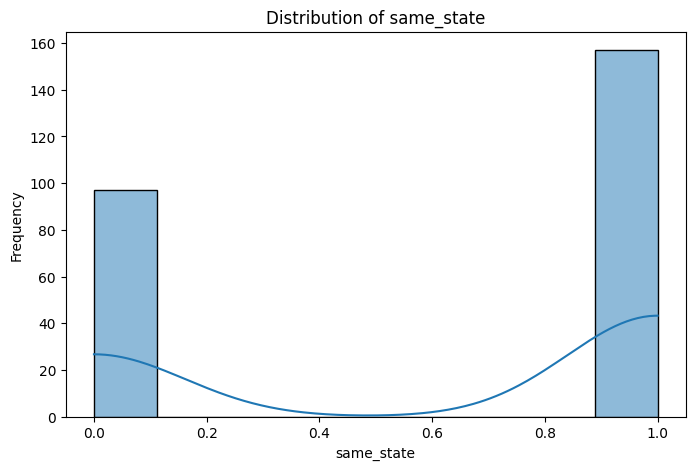

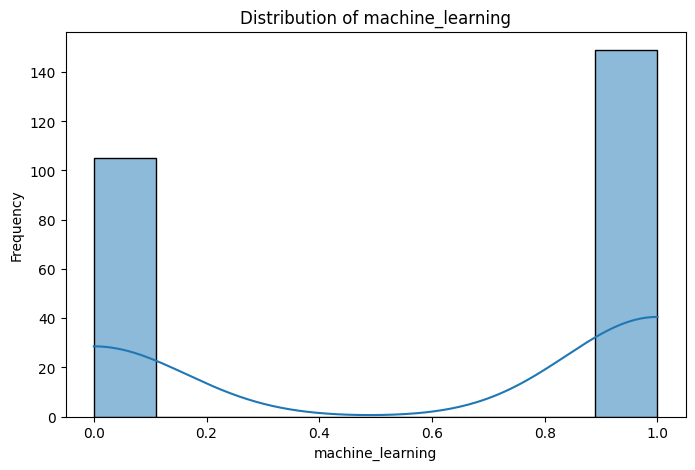

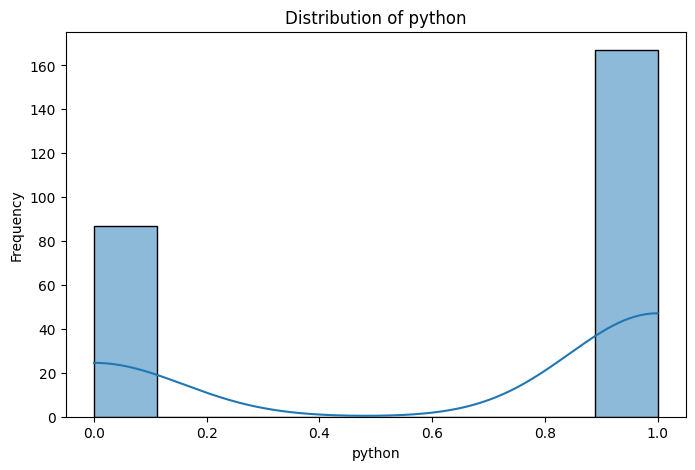

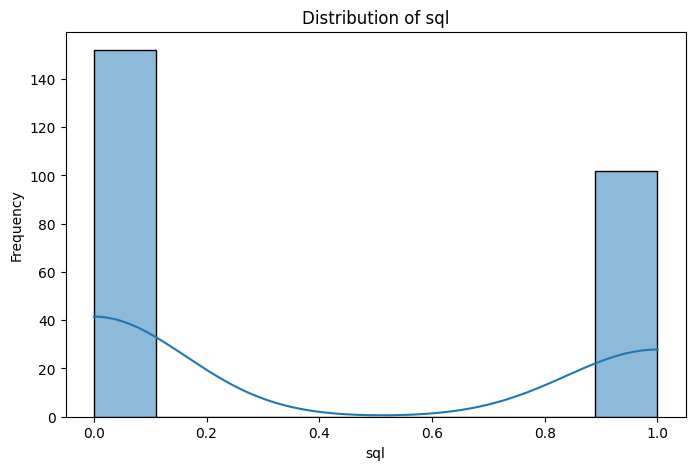

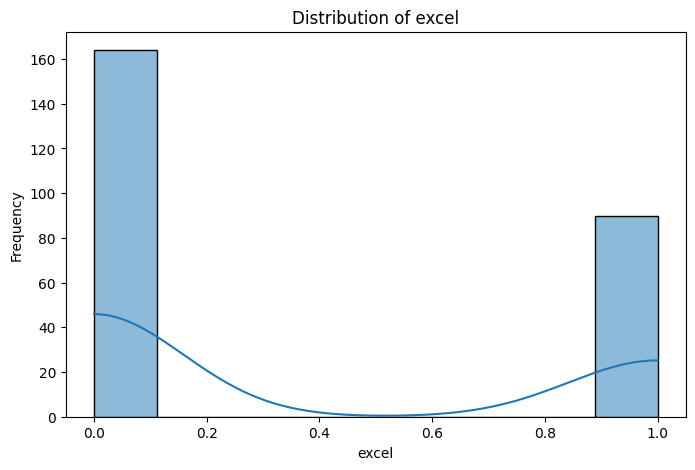

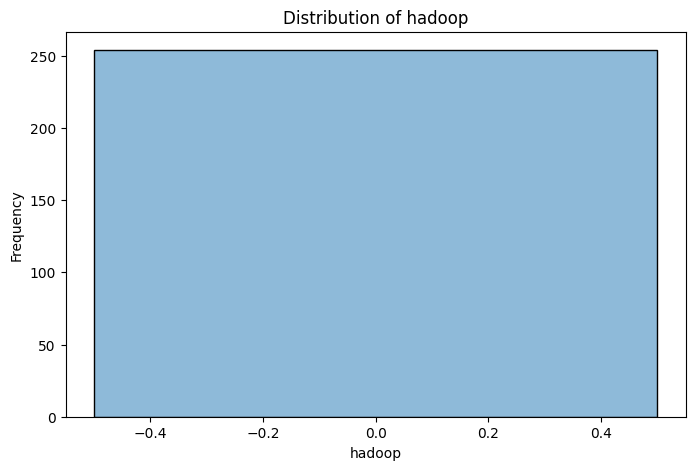

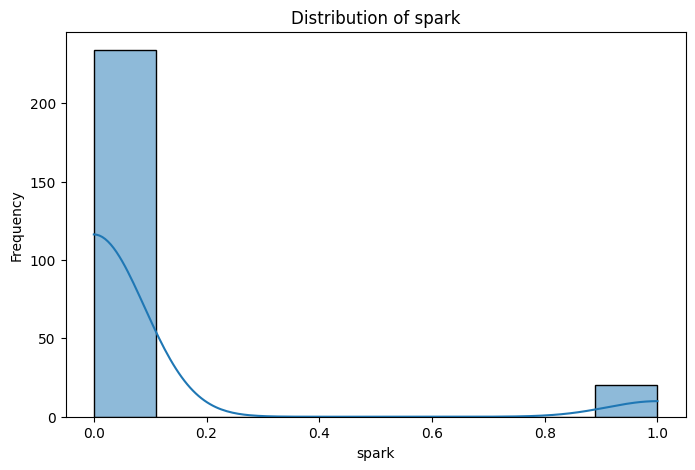

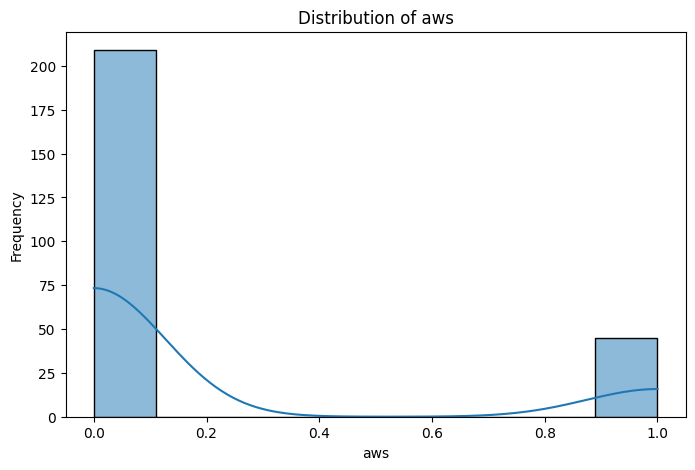

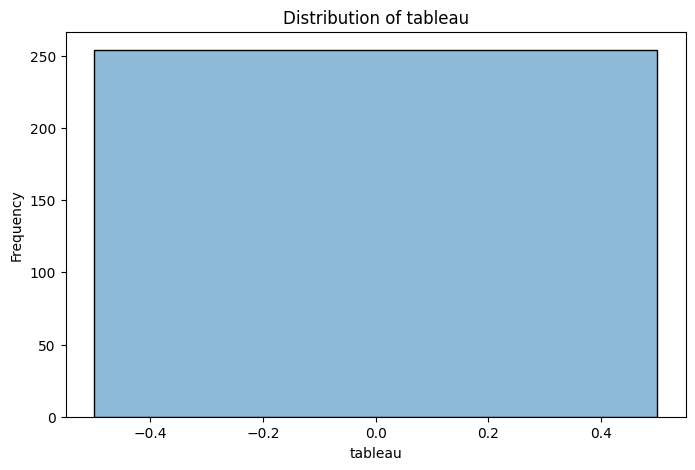

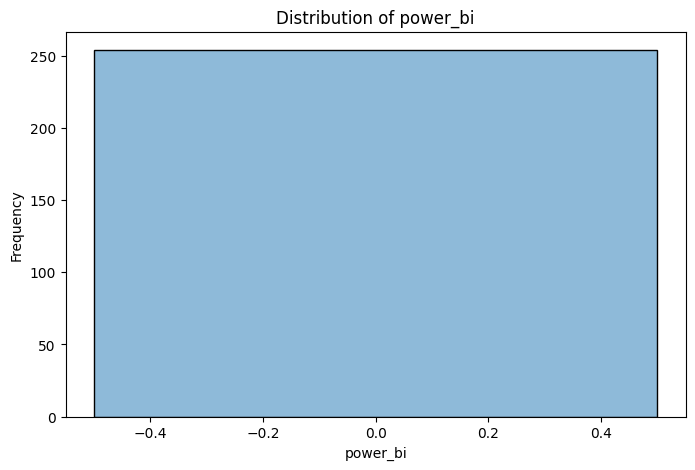

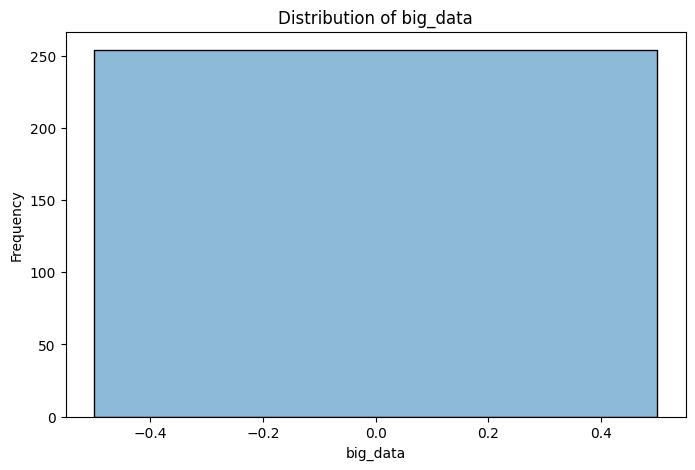

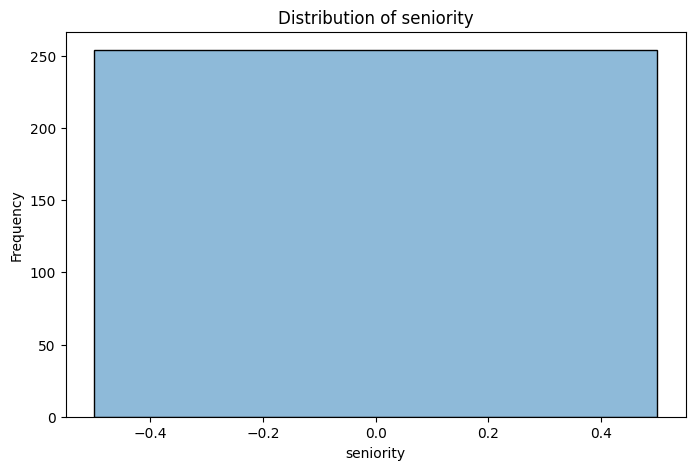

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the dataset
df = pd.read_csv("glassdoor2.csv")  # Update 'your_dataset.csv' with your dataset file name

# List the categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features[1:])

# Identify the percentage of missing values
missing_categorical = df[categorical_features].isnull().mean() * 100
missing_numerical = df[numerical_features[1:]].isnull().mean() * 100

print("\nPercentage of missing values in categorical features:")
print(missing_categorical)
print("\nPercentage of missing values in numerical features:")
print(missing_numerical)

# Examine the spread of numerical data and identify outliers using Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_features])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

# Handle outliers using IQR
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers
df_cleaned = df[~outliers]

# Distribution plot
for feature in numerical_features :
    if feature!='Unnamed: 0':
        plt.figure(figsize=(8, 5))
        sns.histplot(df_cleaned[feature], kde=True)
        plt.title(f"Distribution of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.show()

C:\Users\sraad\AppData\Local\Temp\ipykernel_12680\1381512952.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=com_counts.index, y=com_counts.values, palette="viridis")


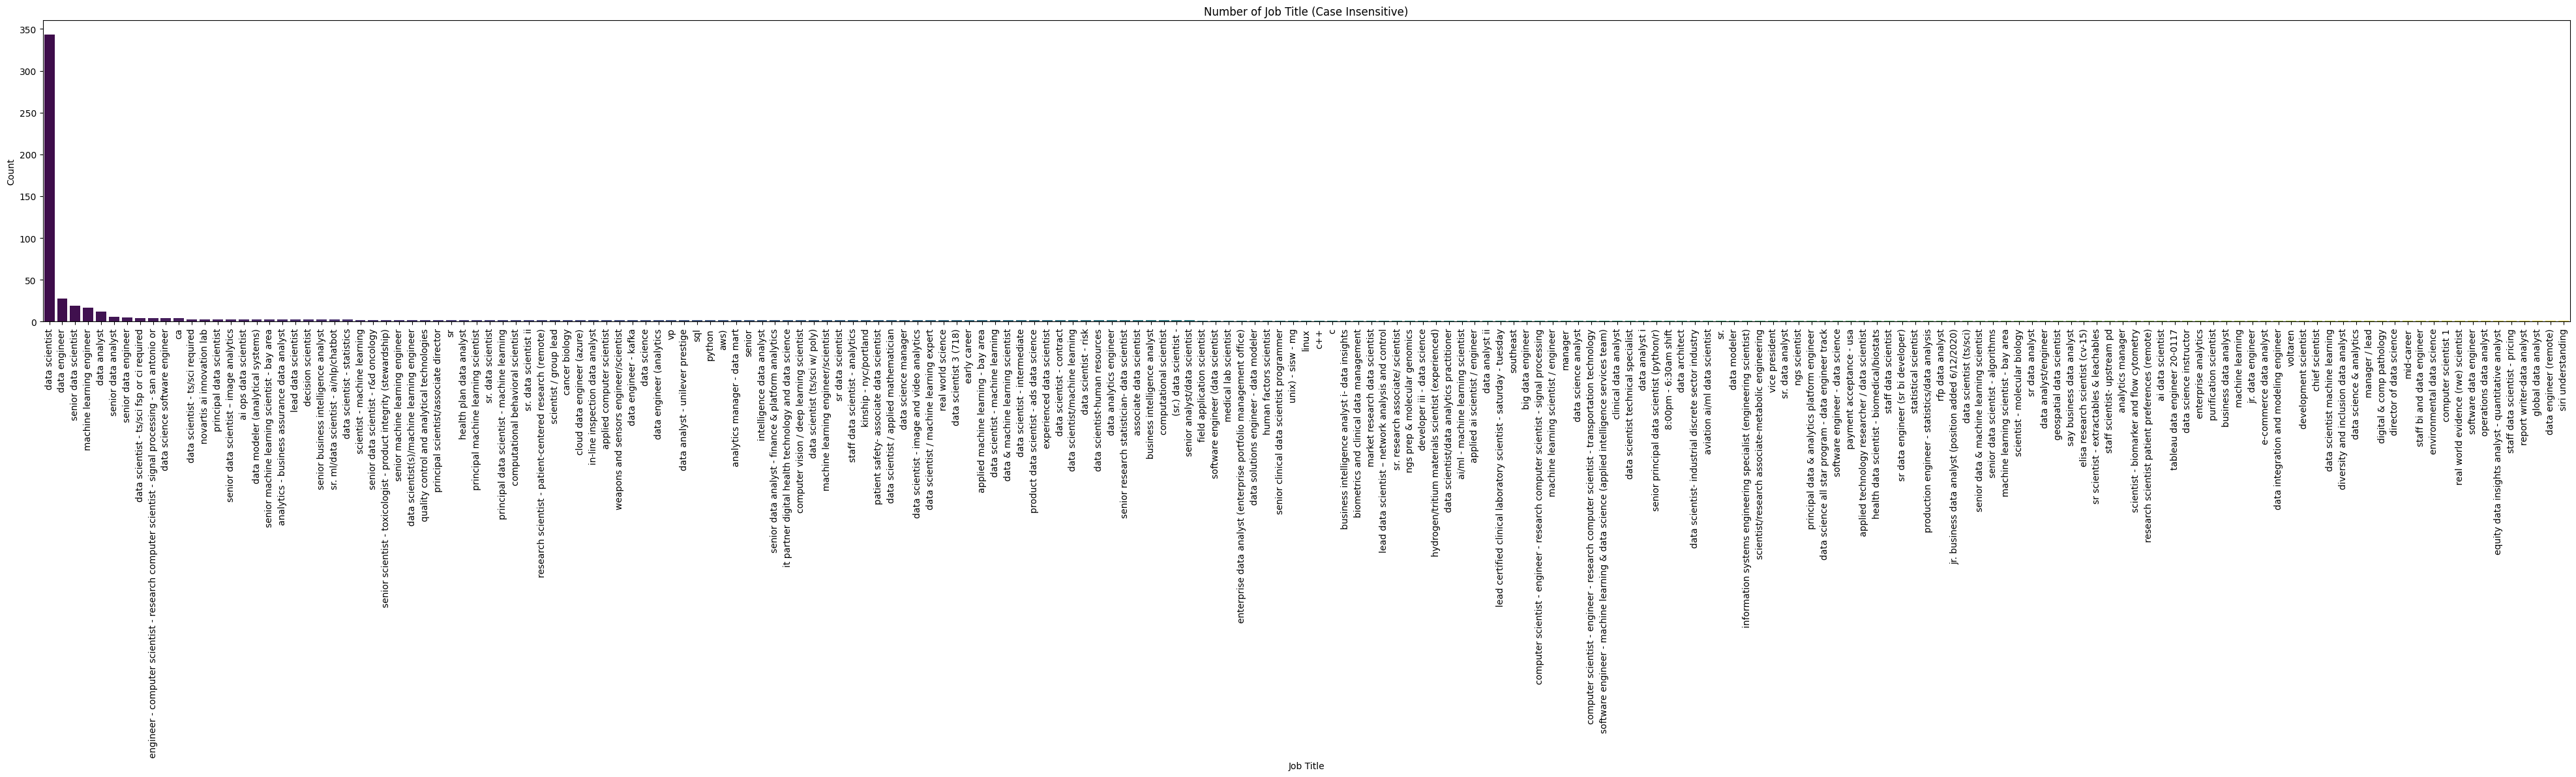

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
edata = pd.read_csv("glassdoor2.csv")

# Clean and count unique genres, treating case insensitively
newData = edata['Job Title'].str.lower().str.split(',')
unique_com = newData.explode().str.strip().unique()
com_counts = newData.explode().str.strip().value_counts()

# Create a bar chart
plt.figure(figsize=(50, 6))
sns.barplot(x=com_counts.index, y=com_counts.values, palette="viridis")
plt.title("Number of Job Title (Case Insensitive)")
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


C:\Users\sraad\AppData\Local\Temp\ipykernel_12680\1526588782.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


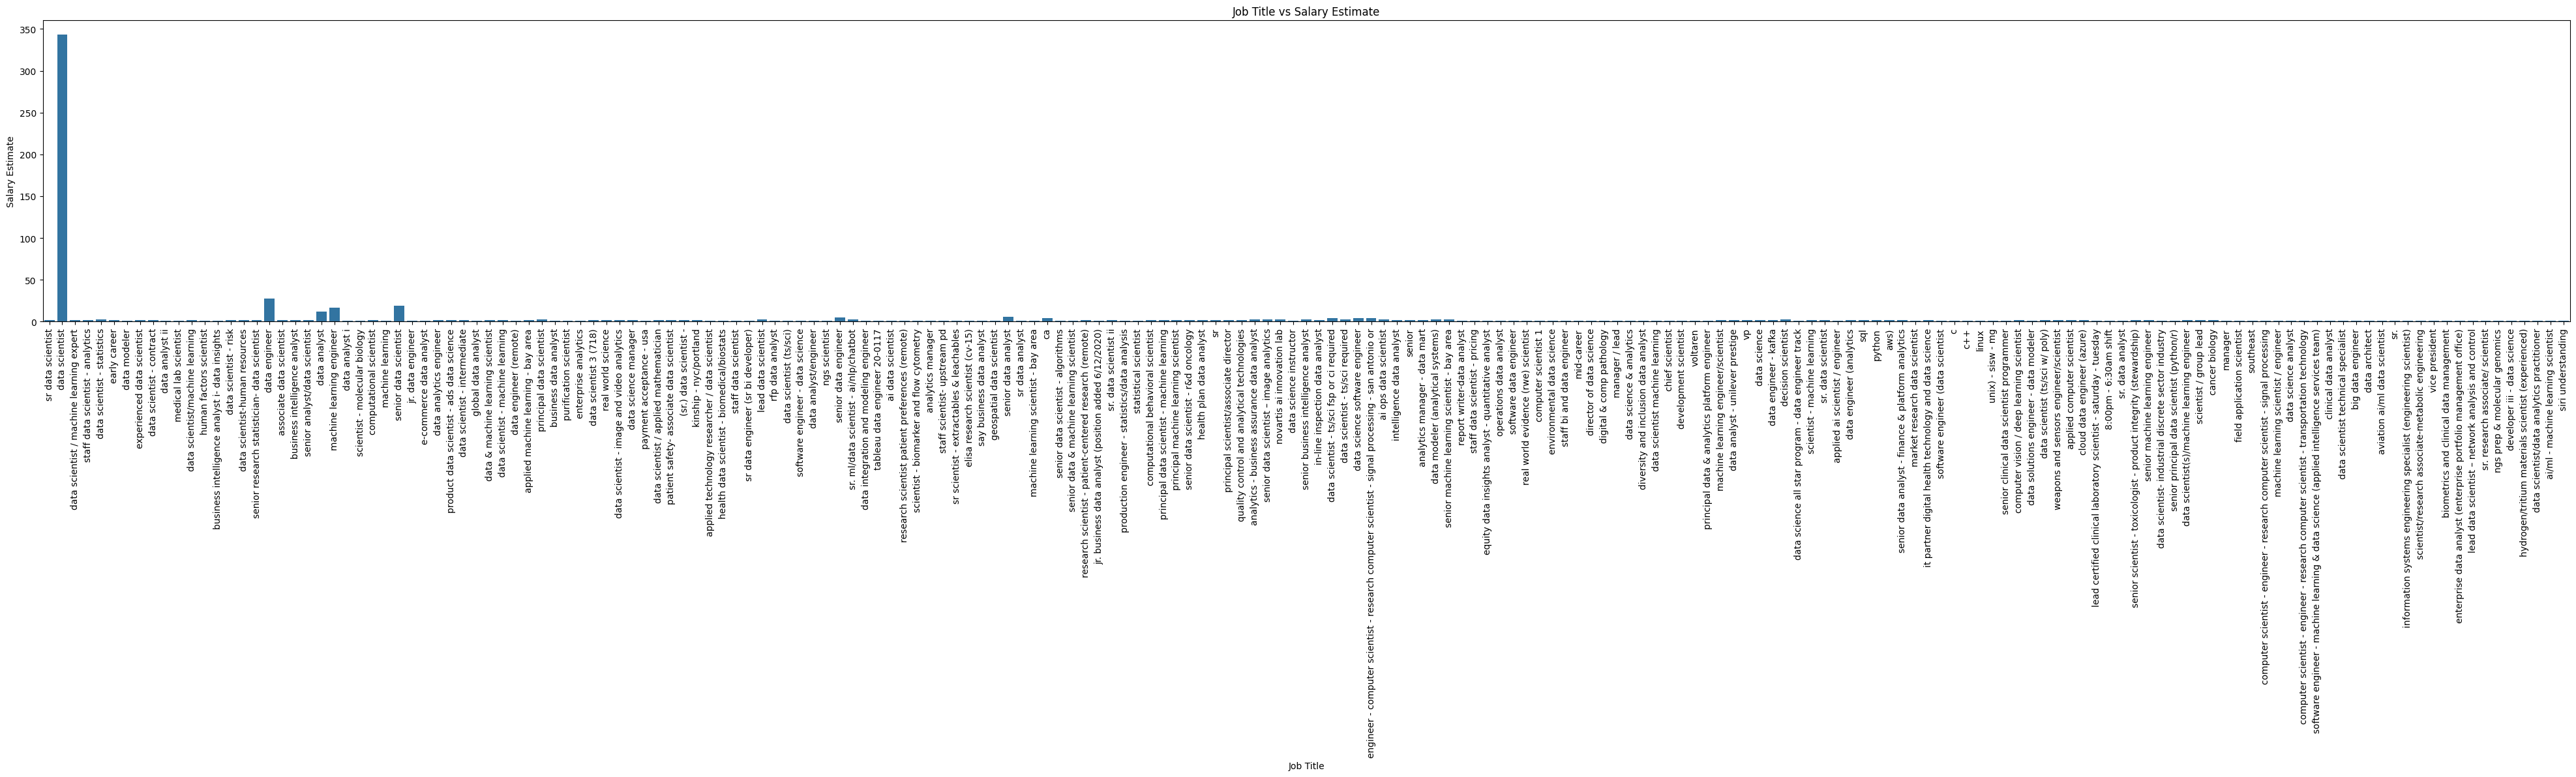

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
edata = pd.read_csv("glassdoor2.csv")

# Convert 'Job Title' to lowercase and split by ','
edata['Job Title'] = edata['Job Title'].str.lower().str.split(',')

# Explode the lists to rows
exploded_data = edata.explode('Job Title')

# Strip whitespace from job titles
exploded_data['Job Title'] = exploded_data['Job Title'].str.strip()

# Filter out empty strings
exploded_data = exploded_data[exploded_data['Job Title'] != '']

# Create a bar plot of Job Title vs Salary Estimate
plt.figure(figsize=(50, 6))
sns.barplot(x='Job Title', y='Salary Avg', data=exploded_data, estimator=lambda x: len(x))
plt.title("Job Title vs Salary Estimate")
plt.xlabel("Job Title")
plt.ylabel("Salary Estimate(in K dollars)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


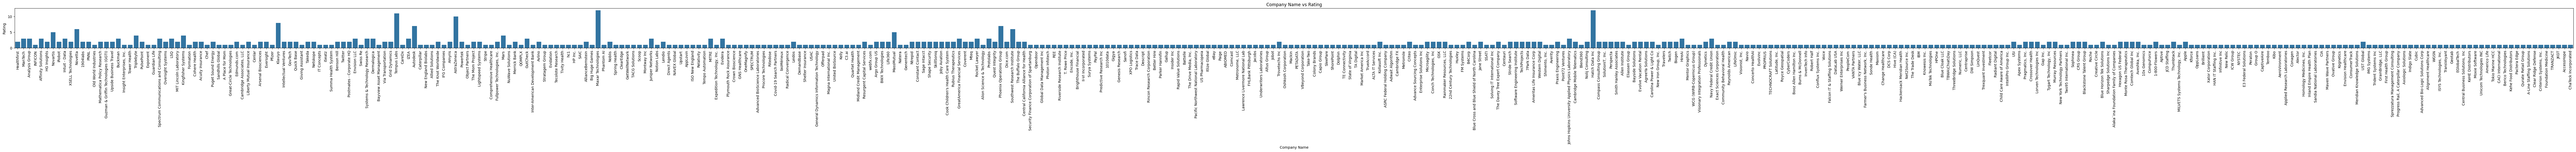

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
edata = pd.read_csv("glassdoor2.csv")

# Drop rows with missing values in 'Company Name' or 'Rating'
edata.dropna(subset=['Company Name', 'Rating'], inplace=True)

# Create a bar plot of Company Name vs Rating
plt.figure(figsize=(100, 6))
sns.barplot(x='Company Name', y='Rating', data=edata, estimator=lambda x: len(x))
plt.title("Company Name vs Rating")
plt.xlabel("Company Name")
plt.ylabel("Rating")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


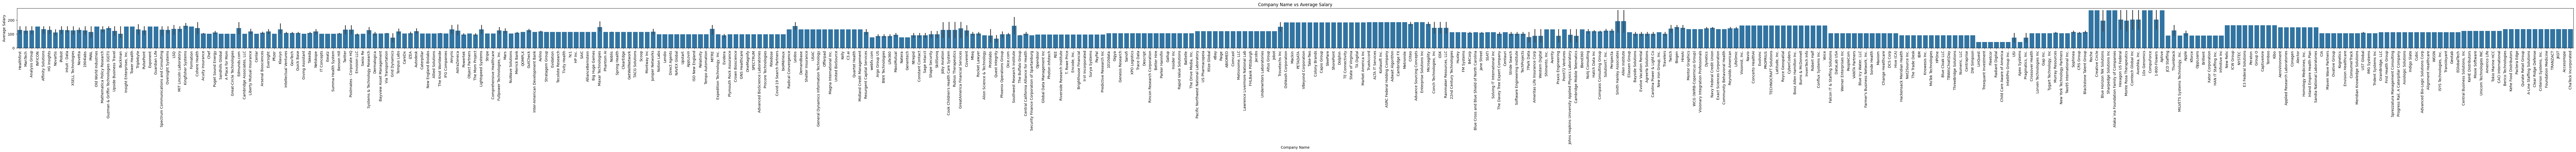

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
edata = pd.read_csv("glassdoor2.csv")

# Drop rows with missing values in 'Company Name' or 'Salary Avg'
edata.dropna(subset=['Company Name', 'Salary Avg'], inplace=True)

# Create a bar plot of Company Name vs Average Salary
plt.figure(figsize=(100, 6))
sns.barplot(x='Company Name', y='Salary Avg', data=edata)
plt.title("Company Name vs Average Salary")
plt.xlabel("Company Name")
plt.ylabel("Average Salary")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


C:\Users\sraad\AppData\Local\Temp\ipykernel_12680\502812777.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='Salary Avg', data=avg_salary_by_location, palette='viridis')


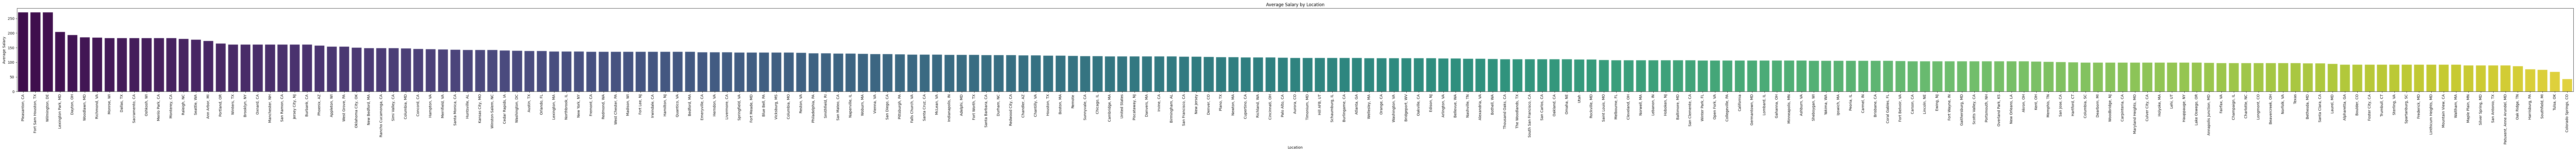

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
edata = pd.read_csv("glassdoor2.csv")

# Drop rows with missing values in 'Location' or 'Salary Avg'
edata.dropna(subset=['Location', 'Salary Avg'], inplace=True)

# Group by location and calculate the average salary
avg_salary_by_location = edata.groupby('Location')['Salary Avg'].mean().reset_index()

# Sort the data by average salary
avg_salary_by_location.sort_values(by='Salary Avg', ascending=False, inplace=True)

# Create a bar plot
plt.figure(figsize=(100, 6))
sns.barplot(x='Location', y='Salary Avg', data=avg_salary_by_location, palette='viridis')
plt.title("Average Salary by Location")
plt.xlabel("Location")
plt.ylabel("Average Salary")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



C:\Users\sraad\AppData\Local\Temp\ipykernel_12680\3115471741.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type of Ownership', y='Number of Companies', data=company_count_by_ownership, palette='viridis')


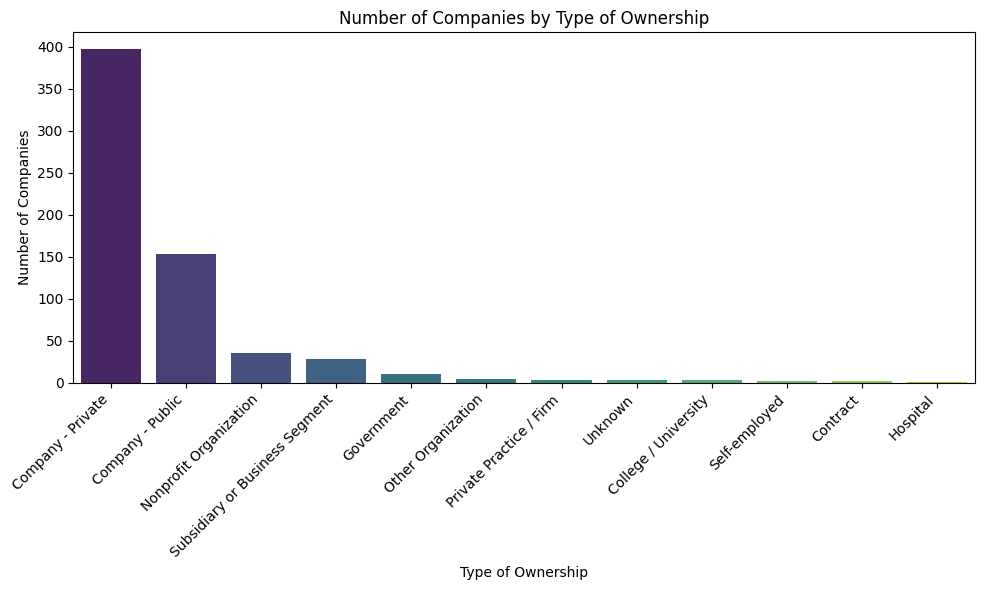

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
edata = pd.read_csv("glassdoor2.csv")

# Drop rows with missing values in 'Type of Ownership'
edata.dropna(subset=['Type of ownership'], inplace=True)

# Count the number of companies for each type of ownership
company_count_by_ownership = edata['Type of ownership'].value_counts().reset_index()
company_count_by_ownership.columns = ['Type of Ownership', 'Number of Companies']

# Sort the data by number of companies
company_count_by_ownership.sort_values(by='Number of Companies', ascending=False, inplace=True)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Type of Ownership', y='Number of Companies', data=company_count_by_ownership, palette='viridis')
plt.title("Number of Companies by Type of Ownership")
plt.xlabel("Type of Ownership")
plt.ylabel("Number of Companies")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
